### First Matters

In [1]:
#this cell handles all imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
#this reads this jigawa_state csv file
df = pd.read_csv('/content/Jigawastate.csv')

In [3]:
#explore basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 43 columns):
 #   Column                                                       Non-Null Count  Dtype 
---  ------                                                       --------------  ----- 
 0   Region / Province                                            48 non-null     object
 1   Year                                                         48 non-null     int64 
 2   Month                                                        48 non-null     object
 3   Total Pop                                                    48 non-null     int64 
 4   Popn at risk of malaria                                      48 non-null     int64 
 5   mmyyyy                                                       48 non-null     object
 6   Outpatient Attendance                                        48 non-null     int64 
 7   Antenatal total attendance                                   48 non-null     int64 
 8   An

Columns 0 to 42: They represent the column index and the corresponding column names. For example, column 0 is named "Region / Province," column 1 is named "Year," column 2 is named "Month," and so on.

"Non-Null Count": This indicates the number of non-null (non-missing) values present in each column. In this case, all 48 rows have non-null values for each column.

"Dtype": This specifies the data type of each column. The data types displayed include object for textual or mixed data, and int64 for integer data.

In [4]:
pregnant_df = df[['mmyyyy', 'Outpatient Attendance', 'Total Pop', 'Popn at risk of malaria',
                 'Pregnant women receiving LLIN', 'Malaria confirmed pregnant women', 'Total LLIN',
                 'Total Malaria Cases']]

The code creates a new DataFrame pregnant_df that contains a subset of columns from the original DataFrame df, focusing on data related to pregnant women, LLIN and malaria cases.

In [5]:
children_df = df[['mmyyyy', 'Outpatient Attendance', 'Total Pop', 'Children under 5 years receiving LLIN',
                  'Total LLIN', 'Total Malaria Cases']]

The code creates a new DataFrame children_df that contains a subset of columns from the original DataFrame df, focusing on data related to children under 5 years, LLIN and malaria cases.

In [6]:
children_df

,mmyyyy,Outpatient Attendance,Total Pop,Children under 5 years receiving LLIN,Total LLIN,Total Malaria Cases
0,14-Jan,308976,5290351,518,4998,168240
1,14-Feb,312671,5301551,727,7245,166168
2,14-Mar,323094,5312774,396,6977,194498
3,14-Apr,299128,5324021,356,6414,177601
4,14-May,333134,5335292,222,4911,162166
5,14-Jun,324545,5346587,142,2457,157253
6,14-Jul,297401,5357906,131,1286,143884
7,14-Aug,320829,5369249,182,1191,201724
8,14-Sep,419834,5380616,34,1728,338512
9,14-Oct,376121,5392007,24867,31456,307898


### EDA for Pregnant Women

In [7]:
pregnant_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 8 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   mmyyyy                            48 non-null     object
 1   Outpatient Attendance             48 non-null     int64 
 2   Total Pop                         48 non-null     int64 
 3   Popn at risk of malaria           48 non-null     int64 
 4   Pregnant women receiving LLIN     48 non-null     int64 
 5   Malaria confirmed pregnant women  48 non-null     int64 
 6   Total LLIN                        48 non-null     int64 
 7   Total Malaria Cases               48 non-null     int64 
dtypes: int64(7), object(1)
memory usage: 3.1+ KB


Same thing the first df.info() does
But notice the mmyyyy in an object dtype we need to change that.

In [8]:
pregnant_df['mmyyyy'] = pd.to_datetime(pregnant_df['mmyyyy'], format='%y-%b')

<ipython-input-8-88b30795f6fe>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pregnant_df['mmyyyy'] = pd.to_datetime(pregnant_df['mmyyyy'], format='%y-%b')


The code snippet converts the values in the 'mmyyyy' column of the DataFrame pregnant_df from a string format to a datetime format using the pd.to_datetime() function from the pandas library.
By converting the 'mmyyyy' column to datetime format, it becomes easier to perform various time-related operations and analysis on the data, such as sorting, filtering by date range, extracting specific components (year, month, etc.), and plotting time series data (If we want).

In [ ]:
pregnant_df.info()
#pregnant_df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 8 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   mmyyyy                            48 non-null     datetime64[ns]
 1   Outpatient Attendance             48 non-null     int64         
 2   Total Pop                         48 non-null     int64         
 3   Popn at risk of malaria           48 non-null     int64         
 4   Pregnant women receiving LLIN     48 non-null     int64         
 5   Malaria confirmed pregnant women  48 non-null     int64         
 6   Total LLIN                        48 non-null     int64         
 7   Total Malaria Cases               48 non-null     int64         
dtypes: datetime64[ns](1), int64(7)
memory usage: 3.1 KB


df.info() again

In [10]:
pregnant_df.describe()

,Outpatient Attendance,Total Pop,Popn at risk of malaria,Pregnant women receiving LLIN,Malaria confirmed pregnant women,Total LLIN,Total Malaria Cases
count,48.000000,4.800000e+01,4.800000e+01,48.000000,48.000000,48.000000,48.000000
mean,283749.937500,5.566417e+06,1.623724e+06,6181.062500,2751.354167,8345.020833,155519.750000
std,64270.811392,1.704524e+05,4.972096e+04,3902.318746,1125.054883,7121.820083,72648.326052
min,194744.000000,5.290351e+06,1.543195e+06,1009.000000,1108.000000,1191.000000,69497.000000
25%,236830.000000,5.423458e+06,1.582023e+06,2682.250000,1964.500000,3068.500000,94863.500000
50%,271261.000000,5.559913e+06,1.621823e+06,5958.000000,2385.500000,7104.000000,142707.500000
75%,319149.750000,5.705128e+06,1.664186e+06,7353.250000,3608.250000,9294.000000,193089.500000
max,505959.000000,5.868101e+06,1.711725e+06,15799.000000,5491.000000,34718.000000,338512.000000


In [11]:
x = pregnant_df.drop('Total Malaria Cases', axis=1)
y = pregnant_df['Total Malaria Cases']

The given code snippet involves splitting a DataFrame named pregnant_df into two separate variables, x and y.

The purpose of this code is to separate the feature data (stored in x) from the target variable data (stored in y). This is a common approach in machine learning tasks, where x typically represents the input features or independent variables, and y represents the target variable or dependent variable that we want to predict or analyze.

In [12]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

The code snippet you provided performs a train-test split on the feature and target variables, x and y, using the train_test_split() function from the scikit-learn library. The resulting split data is assigned to four separate variables: X_train, X_test, y_train, and y_test.

In [13]:
#Dropping mmyyyy column coz we don't need it
X_train = X_train.drop('mmyyyy', axis=1)

In [14]:
#Dropping mmyyyy column coz we don't need it
X_test = X_test.drop('mmyyyy', axis=1)

In [15]:
#joining X_train with y_train to get training data
train_data = X_train.join(y_train)

array([[<Axes: title={'center': 'Outpatient Attendance'}>,
        <Axes: title={'center': 'Total Pop'}>,
        <Axes: title={'center': 'Popn at risk of malaria'}>],
       [<Axes: title={'center': 'Pregnant women receiving LLIN'}>,
        <Axes: title={'center': 'Malaria confirmed pregnant women'}>,
        <Axes: title={'center': 'Total LLIN'}>],
       [<Axes: title={'center': 'Total Malaria Cases'}>, <Axes: >,
        <Axes: >]], dtype=object)

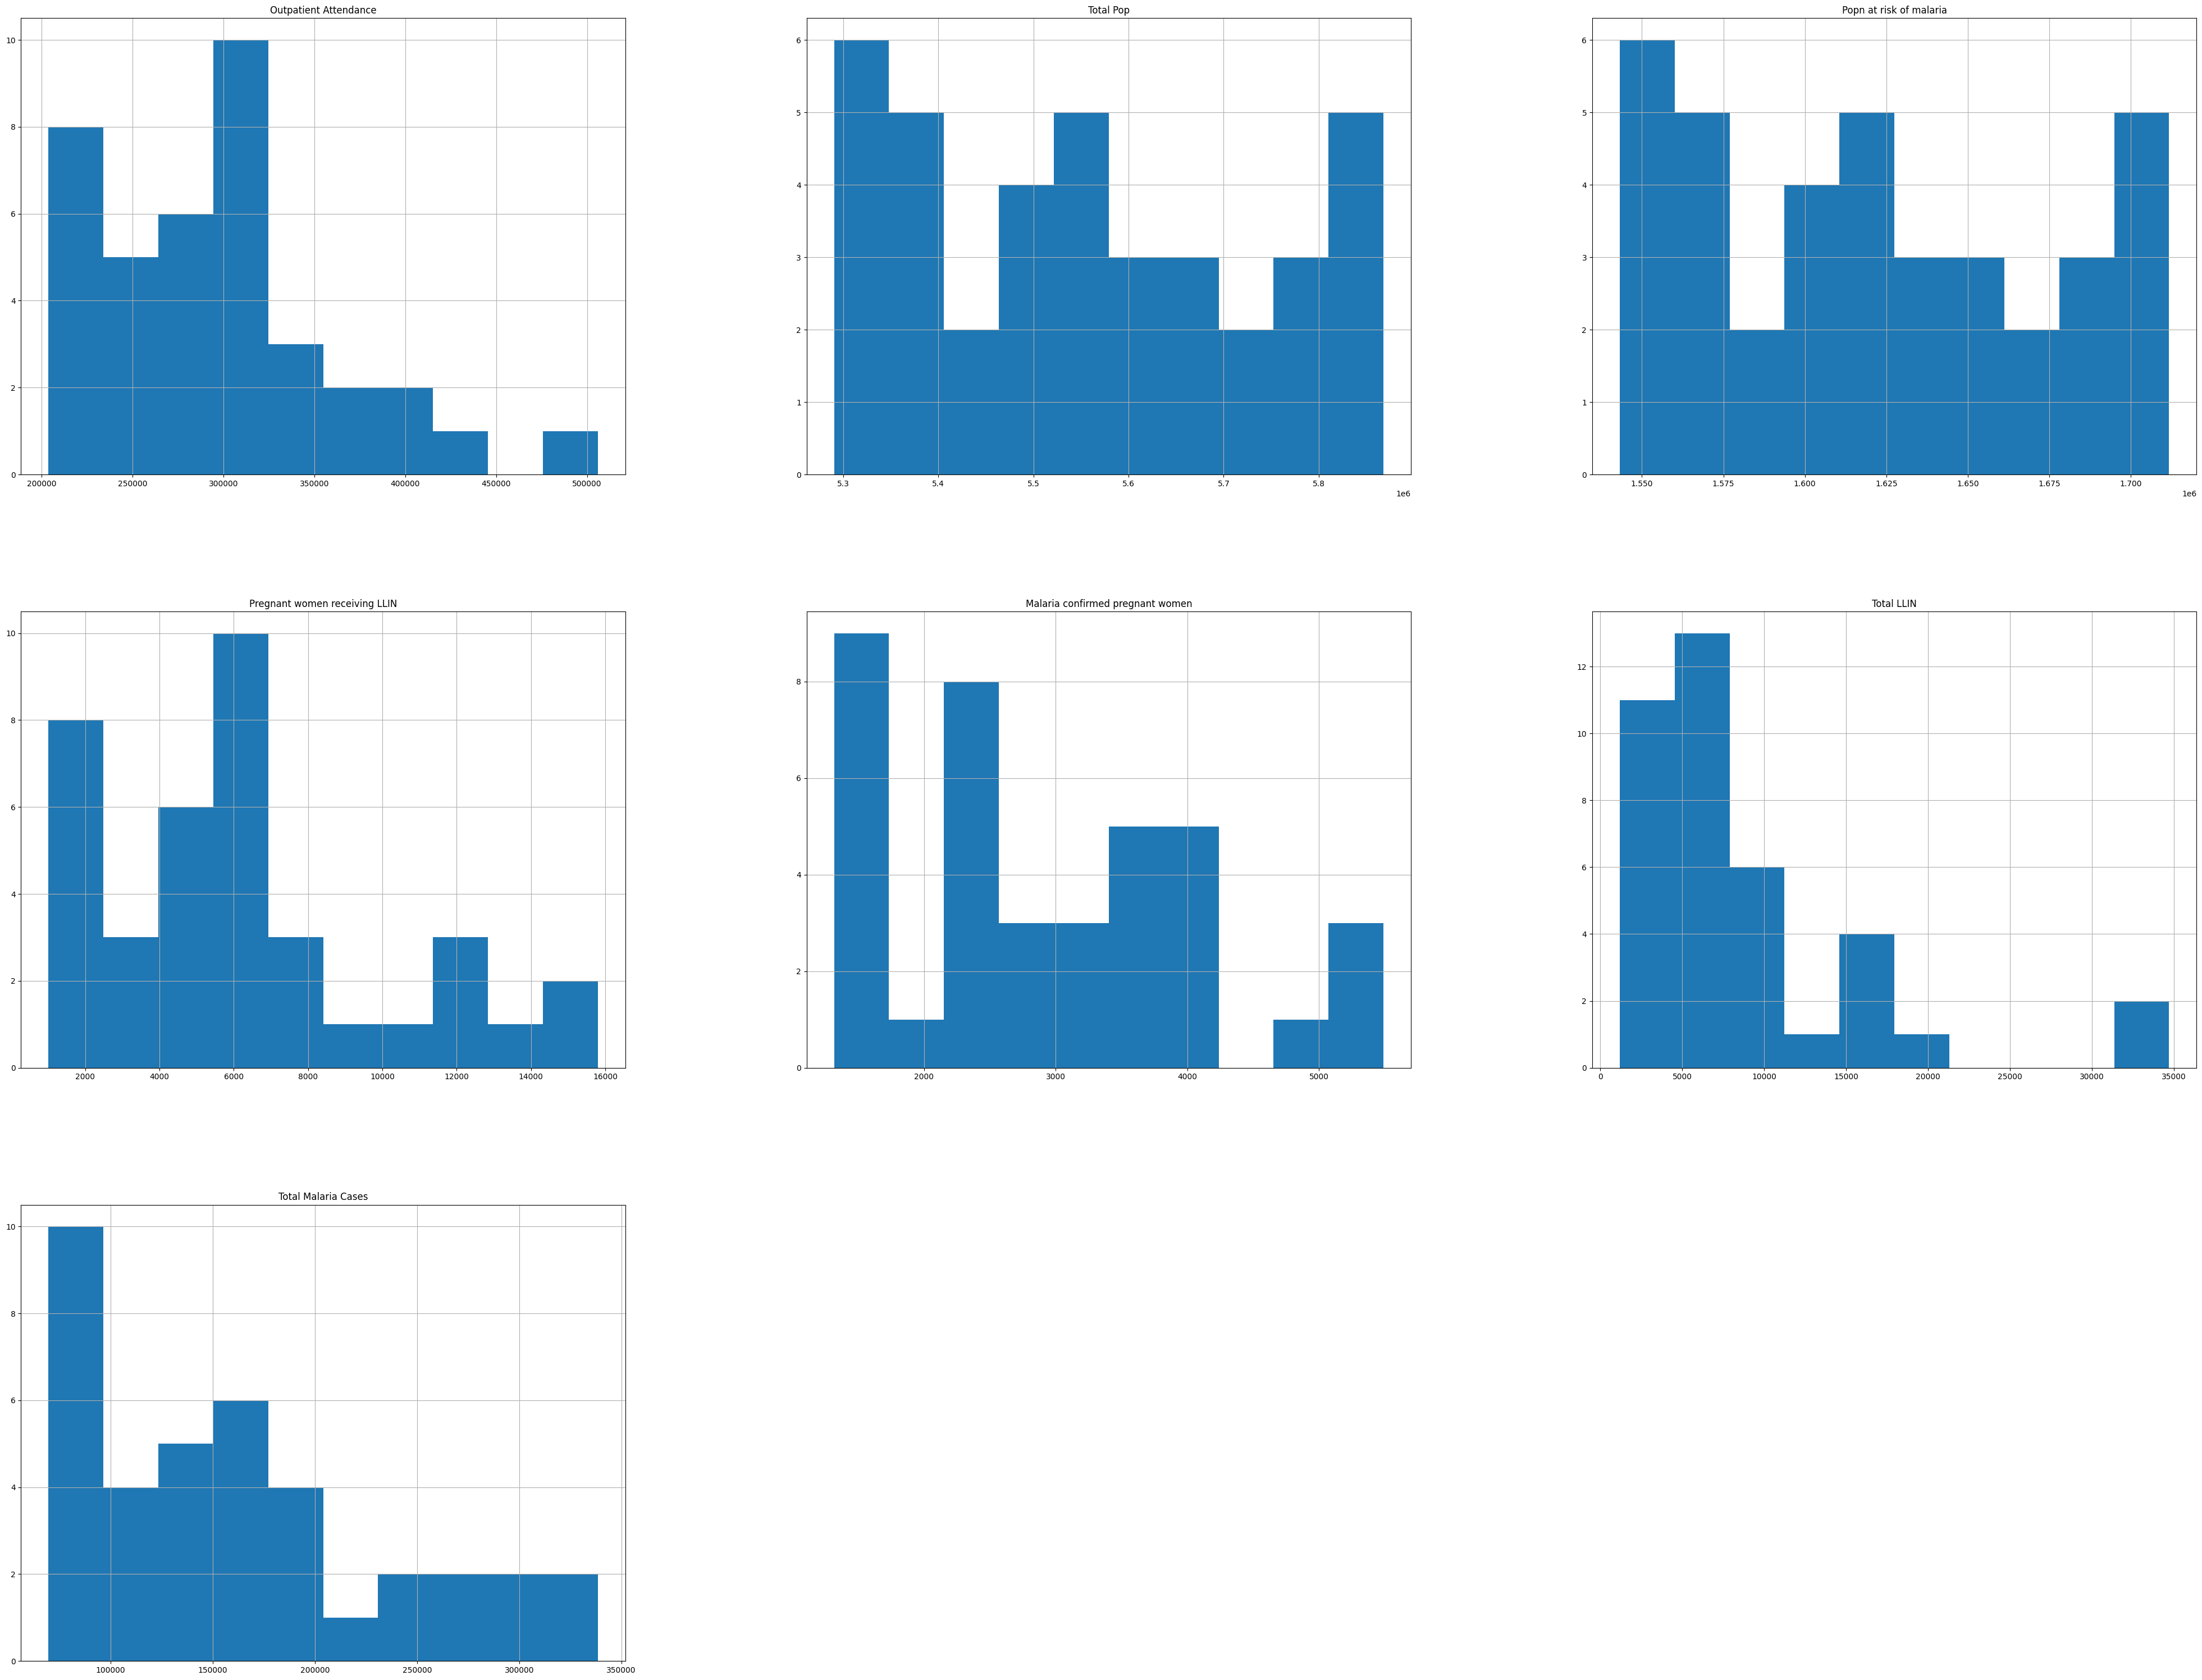

In [ ]:
#let's create a histogram
train_data.hist(figsize=(50,38))

This creates the histogram of all the columns in the subset dataframe (pregnant_df)

What can we notice?
The columns are not normally distributed and we know non-normal data isn't always good for ML. Also note that the Total Population and Population at risk of Malaria looks exactly the same which shows some correlation between the two.

In [ ]:
train_data.corr()

,Outpatient Attendance,Total Pop,Popn at risk of malaria,Pregnant women receiving LLIN,Malaria confirmed pregnant women,Total LLIN,Total Malaria Cases
Outpatient Attendance,1.000000,-0.142914,-0.142914,-0.184282,0.705878,-0.043158,0.875283
Total Pop,-0.142914,1.000000,1.000000,0.437024,-0.483821,0.263826,-0.079090
Popn at risk of malaria,-0.142914,1.000000,1.000000,0.437024,-0.483821,0.263826,-0.079089
Pregnant women receiving LLIN,-0.184282,0.437024,0.437024,1.000000,-0.254721,0.766686,-0.199999
Malaria confirmed pregnant women,0.705878,-0.483821,-0.483821,-0.254721,1.000000,-0.011378,0.821832
Total LLIN,-0.043158,0.263826,0.263826,0.766686,-0.011378,1.000000,0.018986
Total Malaria Cases,0.875283,-0.079090,-0.079089,-0.199999,0.821832,0.018986,1.000000


The code train_data.corr() calculates the correlation matrix of a DataFrame.
- 1 indicates a perfect positive correlation (variables increase together linearly),
- -1 indicates a perfect negative correlation (variables move in opposite directions linearly),
- 0 indicates no linear correlation (variables are not linearly related).

**The Heatmap will show us more**


<Axes: >

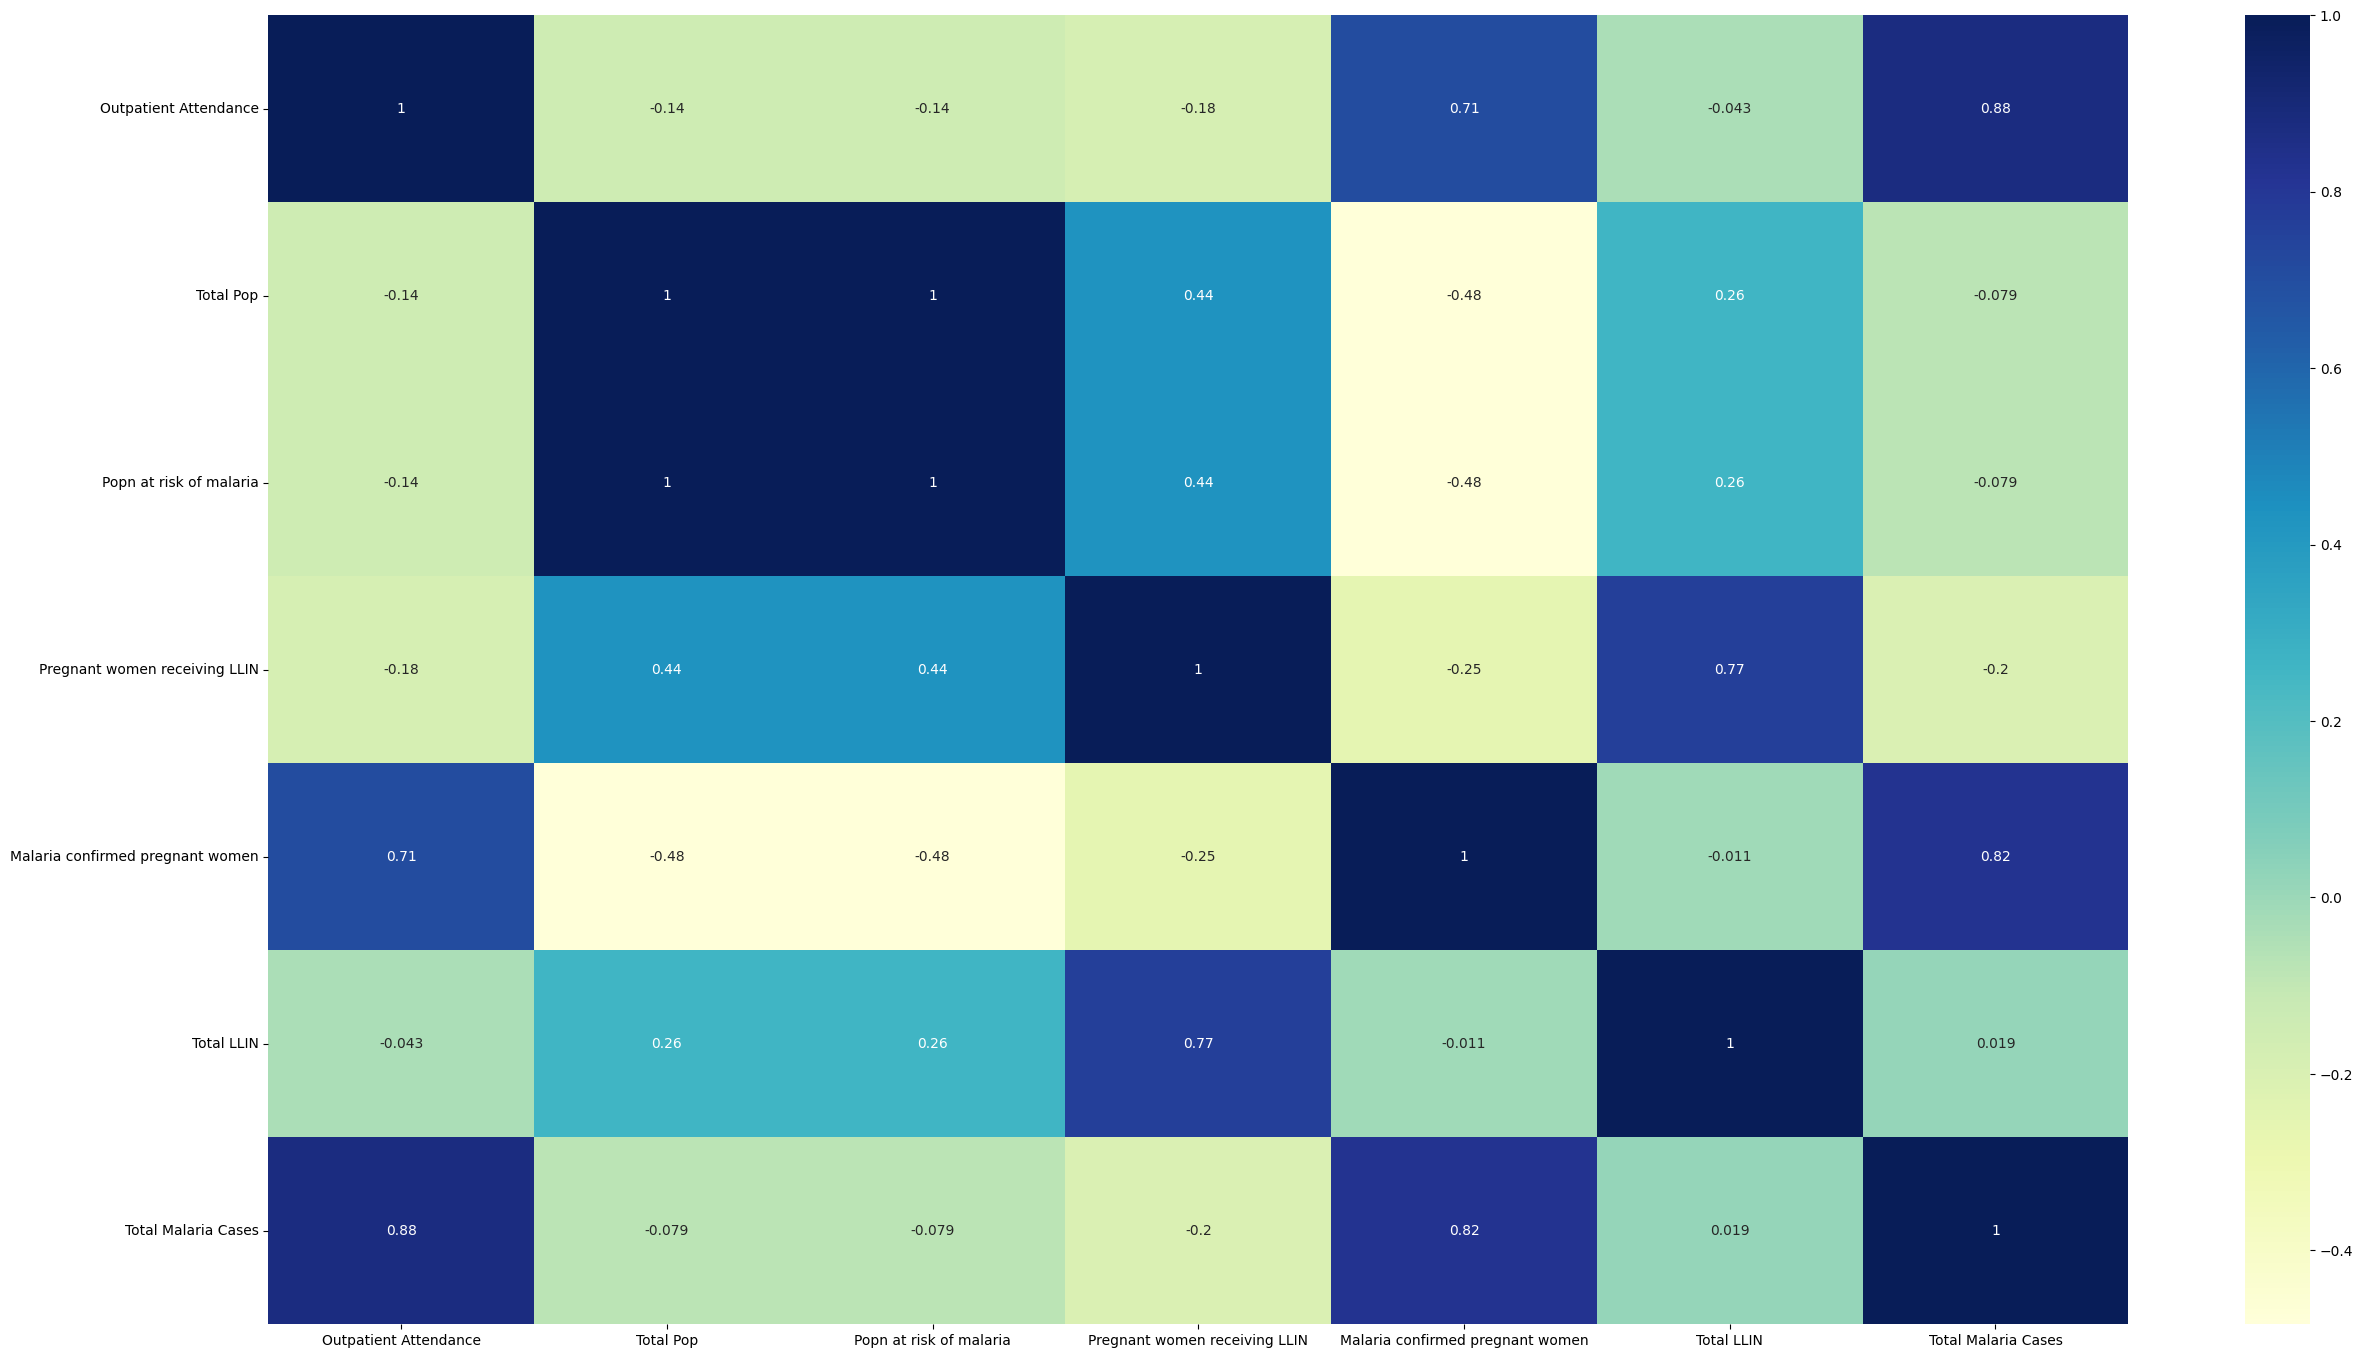

In [ ]:
plt.figure(figsize=(30,17))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

The code snippet you provided creates a heatmap visualization of the correlation matrix using the seaborn library (sns) and matplotlib (plt)
The heatmap visualization provides a visual representation of the correlation matrix. Each cell in the heatmap corresponds to the correlation between two variables, with color indicating the strength and direction of the correlation. Darker colors represent stronger positive or negative correlations, while lighter colors represent weaker or no correlation.
Some things to note:
- Total Pupulation and population at risk of Malaria are perfectly correlated
- Since we are interested in LLIN, we'd see that there is no significant correlation between the "Pregnant women receiving LLIN" and Total Malaria case.
- Malaria cases does not have correlation with the Total LLIN distributed and Total Malaria Cases

<Figure size 3000x1700 with 0 Axes>

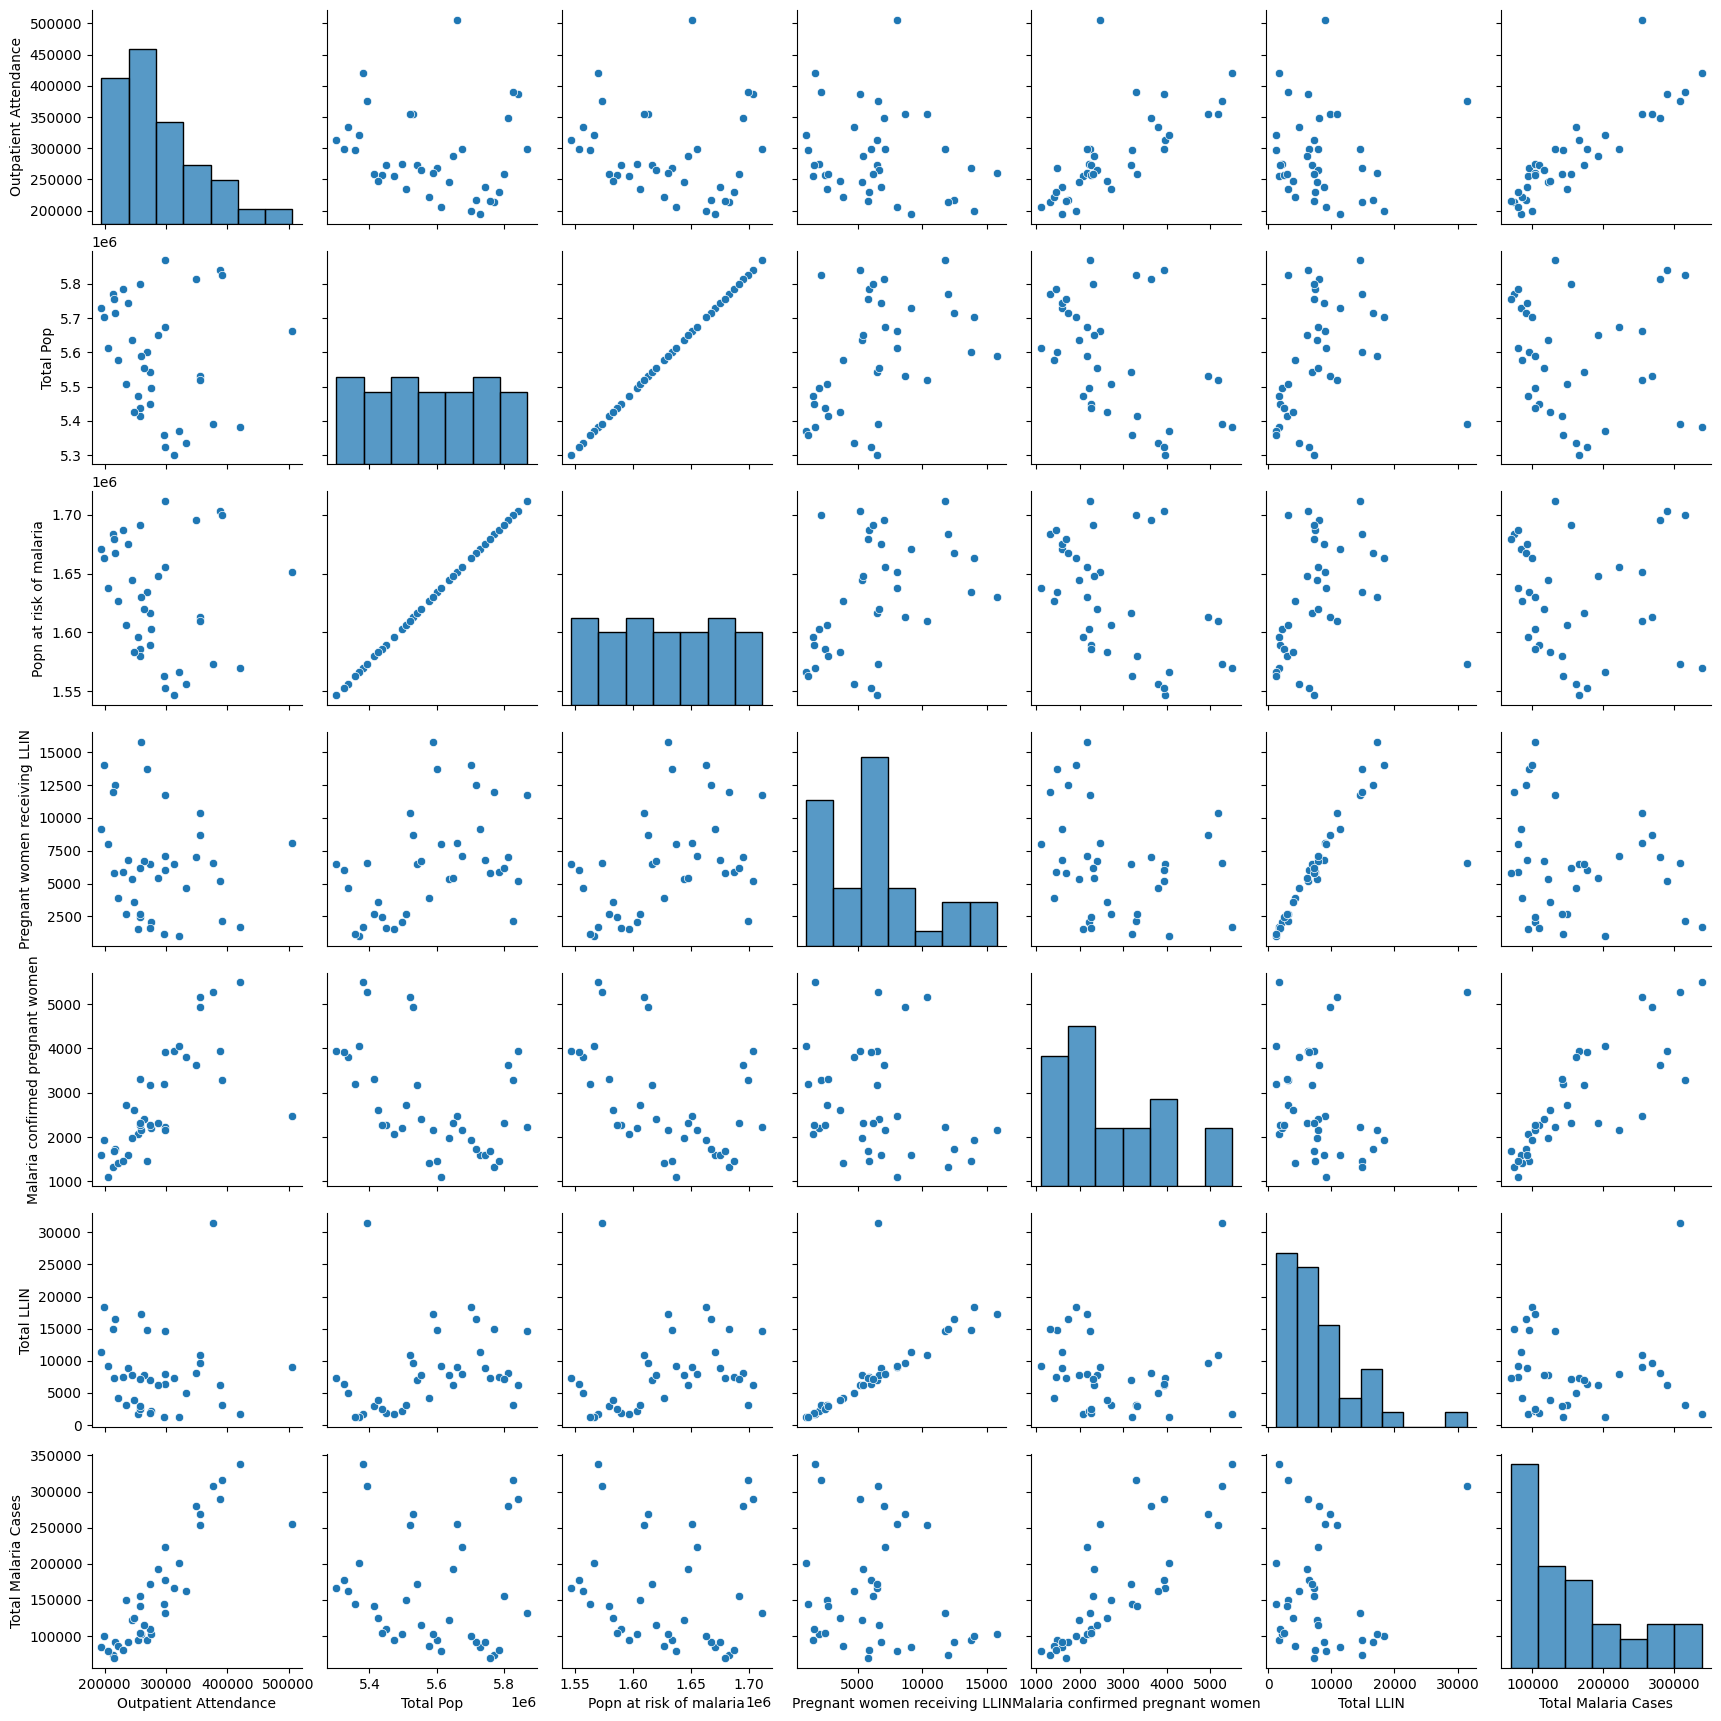

In [ ]:
plt.figure(figsize=(30,17))
sns.pairplot(train_data)

The pairplot is a useful tool for gaining insights into the relationships and distributions of variables in a dataset. It can help identify patterns, correlations, and potential outliers or nonlinear relationships between variables.

We can see some linear relationships between certain variables, just the way the heatmap has reavealed.

In [16]:
#Let's do some MinMaxScaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaled_x_train=scaler.fit_transform(X_train)
scaled_x_test=scaler.fit_transform(X_test)

MinMax scaling (also known as normalization) transforms the data to a range between 0 and 1. It subtracts the minimum value and divides by the range (maximum value minus minimum value) for each feature. This scaling technique is useful when the features have different scales and you want to bring them to a common range, preserving the relative relationships between the data points.

By scaling the data, you can avoid potential issues where features with larger magnitudes dominate the learning process or algorithms that are sensitive to the scale of the features.

In [17]:
df_scaled_x_train=pd.DataFrame(scaled_x_train,columns=X_train.columns)
# df_scaled_x_train.head()

The code snippet df_scaled_x_train = pd.DataFrame(scaled_x_train, columns=X_train.columns) creates a new DataFrame called df_scaled_x_train using the scaled data scaled_x_train and sets the column names to match the columns of the original DataFrame X_train.

In [18]:
df_scaled_x_test=pd.DataFrame(scaled_x_test,columns=X_test.columns)
#df_scaled_x_test.head()

### Linear Regression for Pregnant Women

In [19]:
from sklearn.linear_model import LinearRegression
linear=LinearRegression()
l_model=linear.fit(scaled_x_train,y_train)

Initiating the Linear Regression model and fitting the scaled data

In [20]:
print("Slope:",l_model.coef_)
print("Intercept:",l_model.intercept_)

Slope: [ 1.57168542e+05 -2.05866944e+08  2.05964480e+08  5.08597978e+04
  1.79896043e+05 -7.97781537e+04]
Intercept: 5959.594100351242


The code snippet you provided prints the slope (coefficients) and intercept of the linear regression model

In [ ]:
X_test.join(y_test)

In [21]:
y_test_df = pd.DataFrame(y_test)

In [22]:
y_test_df['regression_pred']=l_model.predict(df_scaled_x_test)
y_test_df['regression_pred']=np.round(y_test_df['regression_pred'], 3)
y_test_df

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


,Total Malaria Cases,regression_pred
16,94298,101538.790
34,150017,148950.870
22,172160,189718.402
21,268901,345503.627
14,109657,124158.841
46,172091,254675.634
10,206430,172285.143
11,141531,150935.051
9,307898,289721.136
29,88226,58490.484


This just shows us the predicted values and the real values from the original dataset. The difference in these values shows how accurate this model is.

<Axes: >

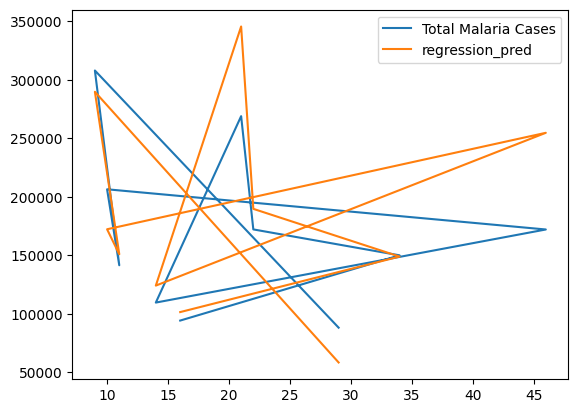

In [23]:
y_test_df[['Total Malaria Cases','regression_pred']].plot()

This further explains the difference in the exact value from our test data and the predicted values by the regression model

In [44]:
error=y_test_df['Total Malaria Cases']-y_test_df['regression_pred']

<ipython-input-45-799f8cdd73a9>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(error)


<Axes: ylabel='Density'>

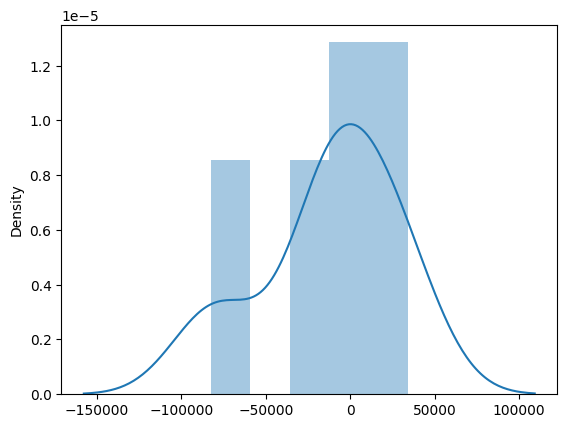

In [45]:
sns.distplot(error)

The distribution of the error.

In [46]:
y_pred = l_model.predict(df_scaled_x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [48]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [49]:
# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 1572925746.348473
Root Mean Squared Error (RMSE): 39660.12791644113
Mean Absolute Error (MAE): 29101.57113466938
R-squared (R2): 0.6680873270482173


The provided values indicate the performance of a regression model.
- The Mean Squared Error (MSE) of 1572925746.348473 measures the average squared difference between the predicted and actual values.
- The Root Mean Squared Error (RMSE) of 39660.12791644113 represents the average magnitude of the residuals in the original unit.
- The Mean Absolute Error (MAE) of 29101.57113466938 measures the average absolute difference between the predicted and actual values.
- Lastly, the R-squared (R2) value of 0.6680873270482173 indicates that approximately 66.8% of the variance in the dependent variable can be explained by the independent variables in the regression model.


### stochastic gradient boosting algorithm

In [50]:
#import
from sklearn.ensemble import GradientBoostingRegressor

In [51]:
#initiating and fitting the model into GBR
n_estimators = 5000
model = GradientBoostingRegressor(n_estimators=n_estimators, loss='squared_error', random_state=42)  # 'ls' refers to least squares loss
model.fit(X_train, y_train)

GradientBoostingRegressor(n_estimators=5000, random_state=42)

In [52]:
# Make predictions using the trained model
y_pred = model.predict(X_test)

In [53]:
# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [54]:
# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 397126763.41111857
Root Mean Squared Error (RMSE): 19928.039627899143
Mean Absolute Error (MAE): 15401.867017593488
R-squared (R2): 0.9161998550468939


This model gave us a better result as we have an R2 of about 91.6%,  it means that 91.6% of the variance in the dependent variable can be explained by the independent variables in the model.

In [55]:
y_test_df['boost_pred']=model.predict(X_test)
y_test_df['boost_pred']=np.round(y_test_df['boost_pred'], 3)
y_test_df

,Total Malaria Cases,regression_pred,boost_pred
16,94298,101538.790,92451.108
34,150017,148950.870,132632.440
22,172160,189718.402,144680.495
21,268901,345503.627,254350.000
14,109657,124158.841,96308.353
46,172091,254675.634,192054.692
10,206430,172285.143,199572.312
11,141531,150935.051,144393.812
9,307898,289721.136,262657.298
29,88226,58490.484,83742.828


Check out the differences in the predicted values and the real values compared to the regression model prediction. There seem to be better prediction.

<Axes: >

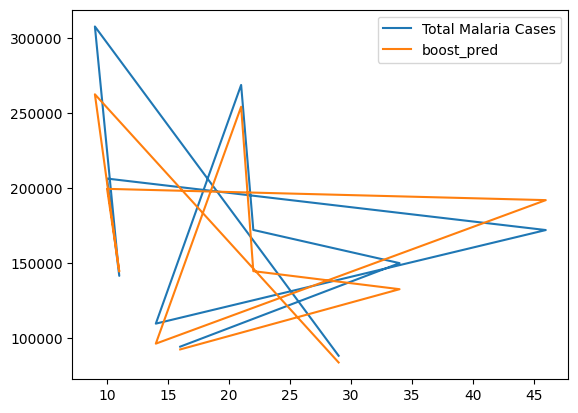

In [56]:
y_test_df[['Total Malaria Cases','boost_pred']].plot()

Diagrammatically, you can see the little difference.

<ipython-input-57-799f8cdd73a9>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(error)


<Axes: ylabel='Density'>

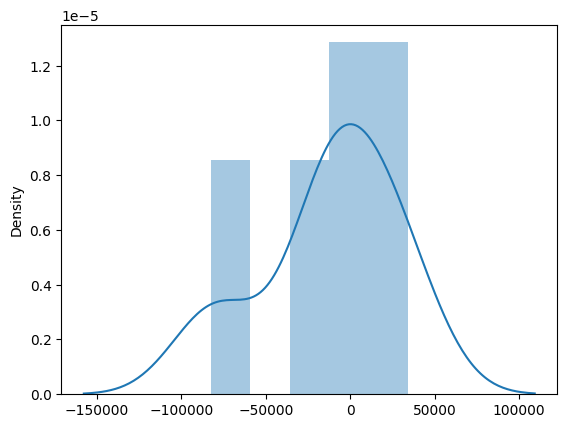

In [57]:
sns.distplot(error)

In [58]:
# Get the feature importances of the model
feature_importances = model.feature_importances_

In [59]:
# Create a dictionary to map feature names to their importance scores
feature_names = ['Outpatient Attendance', 'Total Pop',
       'Popn at risk of malaria', 'Pregnant women receiving LLIN',
       'Malaria confirmed pregnant women', 'Total LLIN',
       'Total Malaria Cases']
feature_importance_dict = {feature_name: importance for feature_name, importance in zip(feature_names, feature_importances)}

In [60]:
# Sort the feature importance dictionary by importance scores in descending order
sorted_feature_importances = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)


In [61]:
# Print the feature names and their importance scores
for feature_name, importance in sorted_feature_importances:
    print(f"{feature_name}: {importance}")

Outpatient Attendance: 0.8621056070097233
Malaria confirmed pregnant women: 0.06083333762952765
Popn at risk of malaria: 0.03145088932619573
Total LLIN: 0.025788186757731972
Pregnant women receiving LLIN: 0.010304348108912323
Total Pop: 0.009517631167908982


What can this tell us? It shows how each variable are important to the prediction model. As we can see the Outpatient Attendance contributed the most. Examining the LLIN varables, we will see that "Total LLIN" and "Pregnant women receiving LLIN" only contributed to 2.5% and 1% respectively and which actually means, these values contributed very little to how many people had malaria in Jigawa State. And note, this is a positive feature importance which means this values contributed 2.5% and 1% positively to the increase in Total Malaria case in Jigawa State.

In [62]:
for feature_name, importance in feature_importance_dict.items():
    if importance > 0:
        print(f"{feature_name}: Positive importance")
    else:
        print(f"{feature_name}: Negative importance")

Outpatient Attendance: Positive importance
Total Pop: Positive importance
Popn at risk of malaria: Positive importance
Pregnant women receiving LLIN: Positive importance
Malaria confirmed pregnant women: Positive importance
Total LLIN: Positive importance


All have positive importance, it means the higher their values, the higher the independent variable and the lower their values, the lower the independent variable.

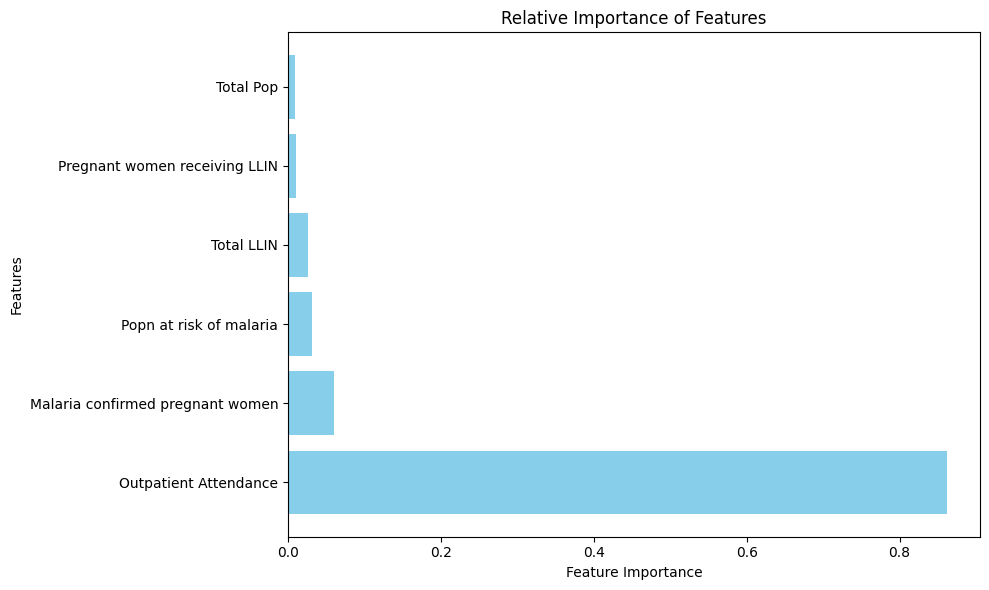

In [63]:
# Extract the feature names and importance scores
feature_names = [feature_name for feature_name, _ in sorted_feature_importances]
importance_scores = [importance for _, importance in sorted_feature_importances]

# Plot the feature importances as a bar plot
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_names)), importance_scores, align='center', color='skyblue')
plt.yticks(range(len(feature_names)), feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Relative Importance of Features')
plt.tight_layout()
plt.show()

A bar chart showing how important the variables are performing in the created model.

### For Children Less than 5 years


In [64]:
children_df['mmyyyy'] = pd.to_datetime(children_df['mmyyyy'], format='%y-%b')

<ipython-input-64-de6d215a54ae>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  children_df['mmyyyy'] = pd.to_datetime(children_df['mmyyyy'], format='%y-%b')


In [65]:
children_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 6 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   mmyyyy                                 48 non-null     datetime64[ns]
 1   Outpatient Attendance                  48 non-null     int64         
 2   Total Pop                              48 non-null     int64         
 3   Children under 5 years receiving LLIN  48 non-null     int64         
 4   Total LLIN                             48 non-null     int64         
 5   Total Malaria Cases                    48 non-null     int64         
dtypes: datetime64[ns](1), int64(5)
memory usage: 2.4 KB


In [66]:
children_df.columns

Index(['mmyyyy', 'Outpatient Attendance', 'Total Pop',
       'Children under 5 years receiving LLIN', 'Total LLIN',
       'Total Malaria Cases'],
      dtype='object')

In [67]:
x = children_df.drop('Total Malaria Cases', axis=1)
y = children_df['Total Malaria Cases']

In [68]:
#Splitting to train and test
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [69]:
#dropping mmyyyy column
X_train = X_train.drop('mmyyyy', axis=1)

In [70]:
#dropping mmyyyy column
X_test = X_test.drop('mmyyyy', axis=1)

In [71]:
train_data = X_train.join(y_train)

array([[<Axes: title={'center': 'Outpatient Attendance'}>,
        <Axes: title={'center': 'Total Pop'}>],
       [<Axes: title={'center': 'Children under 5 years receiving LLIN'}>,
        <Axes: title={'center': 'Total LLIN'}>],
       [<Axes: title={'center': 'Total Malaria Cases'}>, <Axes: >]],
      dtype=object)

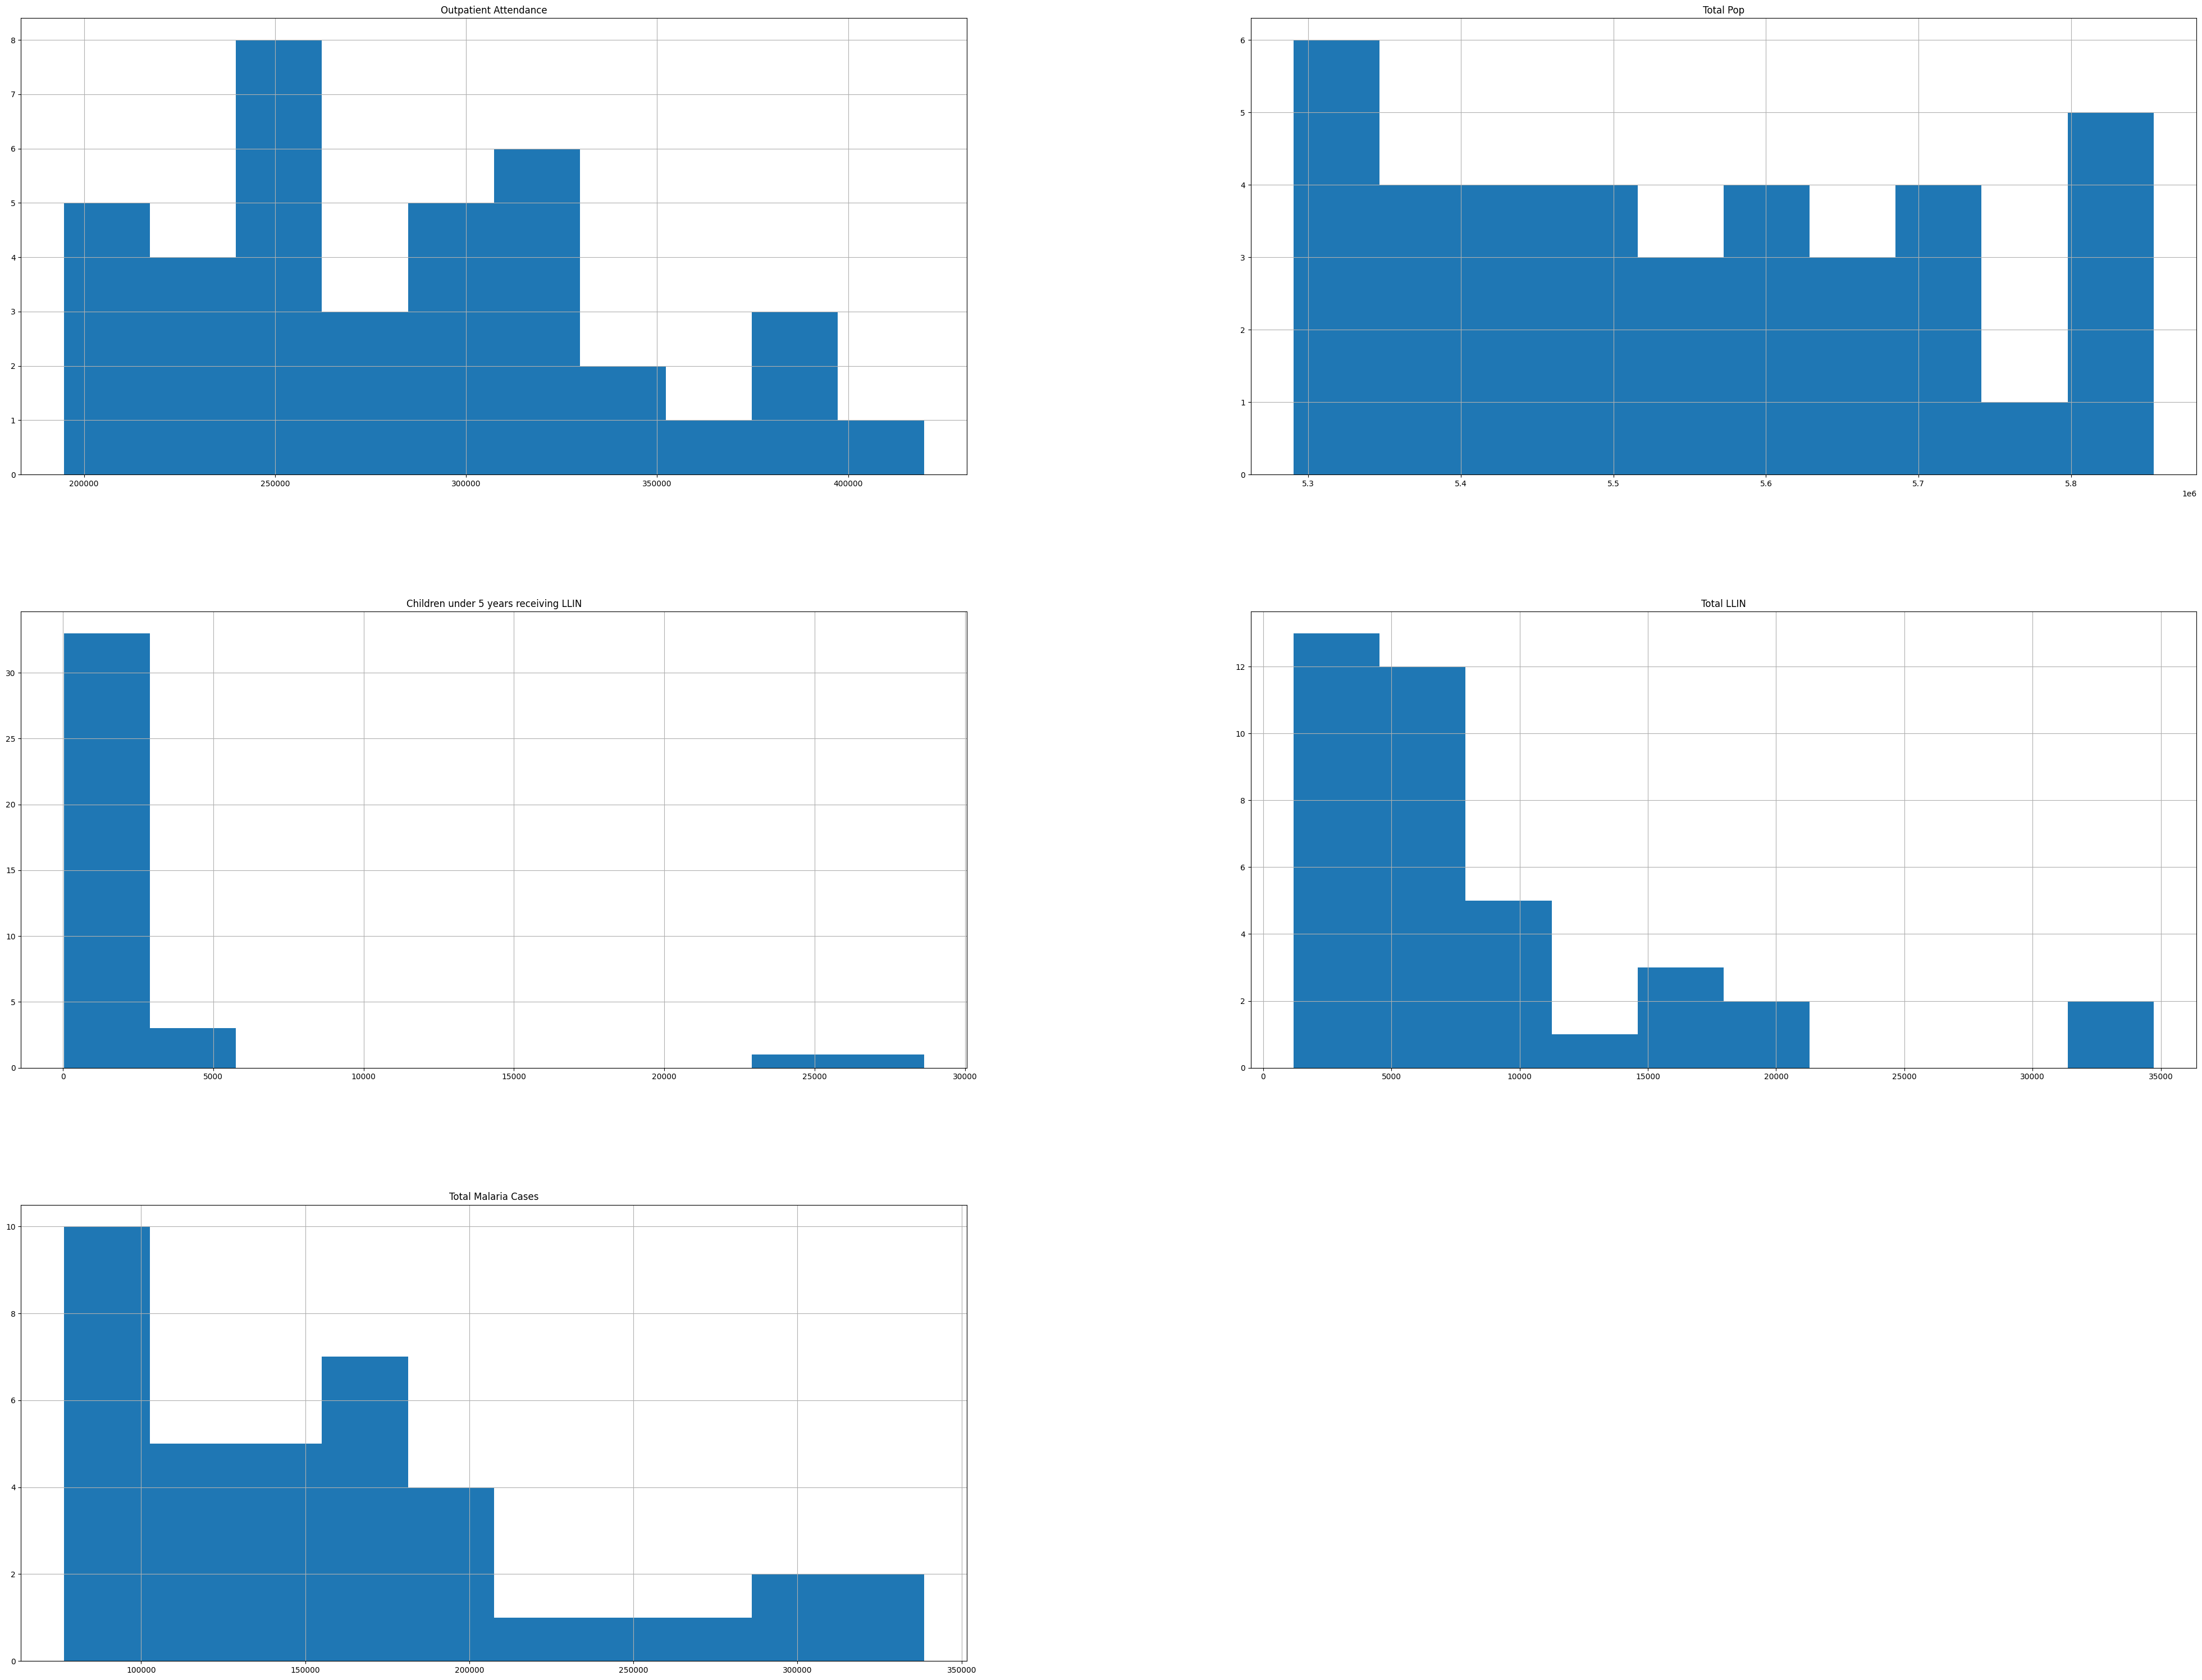

In [ ]:
#plotting the histogram
train_data.hist(figsize=(50,38))

We can see some skewness in these histograms. Main reason we need to perform some scaling.

In [ ]:
#the correlation table
train_data.corr()

,Outpatient Attendance,Total Pop,Children under 5 years receiving LLIN,Total LLIN,Total Malaria Cases
Outpatient Attendance,1.000000,-0.210647,0.171208,-0.014649,0.913380
Total Pop,-0.210647,1.000000,-0.094945,0.131597,-0.005089
Children under 5 years receiving LLIN,0.171208,-0.094945,1.000000,0.856953,0.254295
Total LLIN,-0.014649,0.131597,0.856953,1.000000,0.110863
Total Malaria Cases,0.913380,-0.005089,0.254295,0.110863,1.000000


The correlation table shows some correlation between "Total LLIN" and "Children under 5 years receiving LLIN" which is sensible because the more children come out for LLIN the more we have people receiving the LLIN. Also we saw strong correlation between "Total Malaria Cases" and "Outpatient attendance" which is sensible as well.

<Axes: >

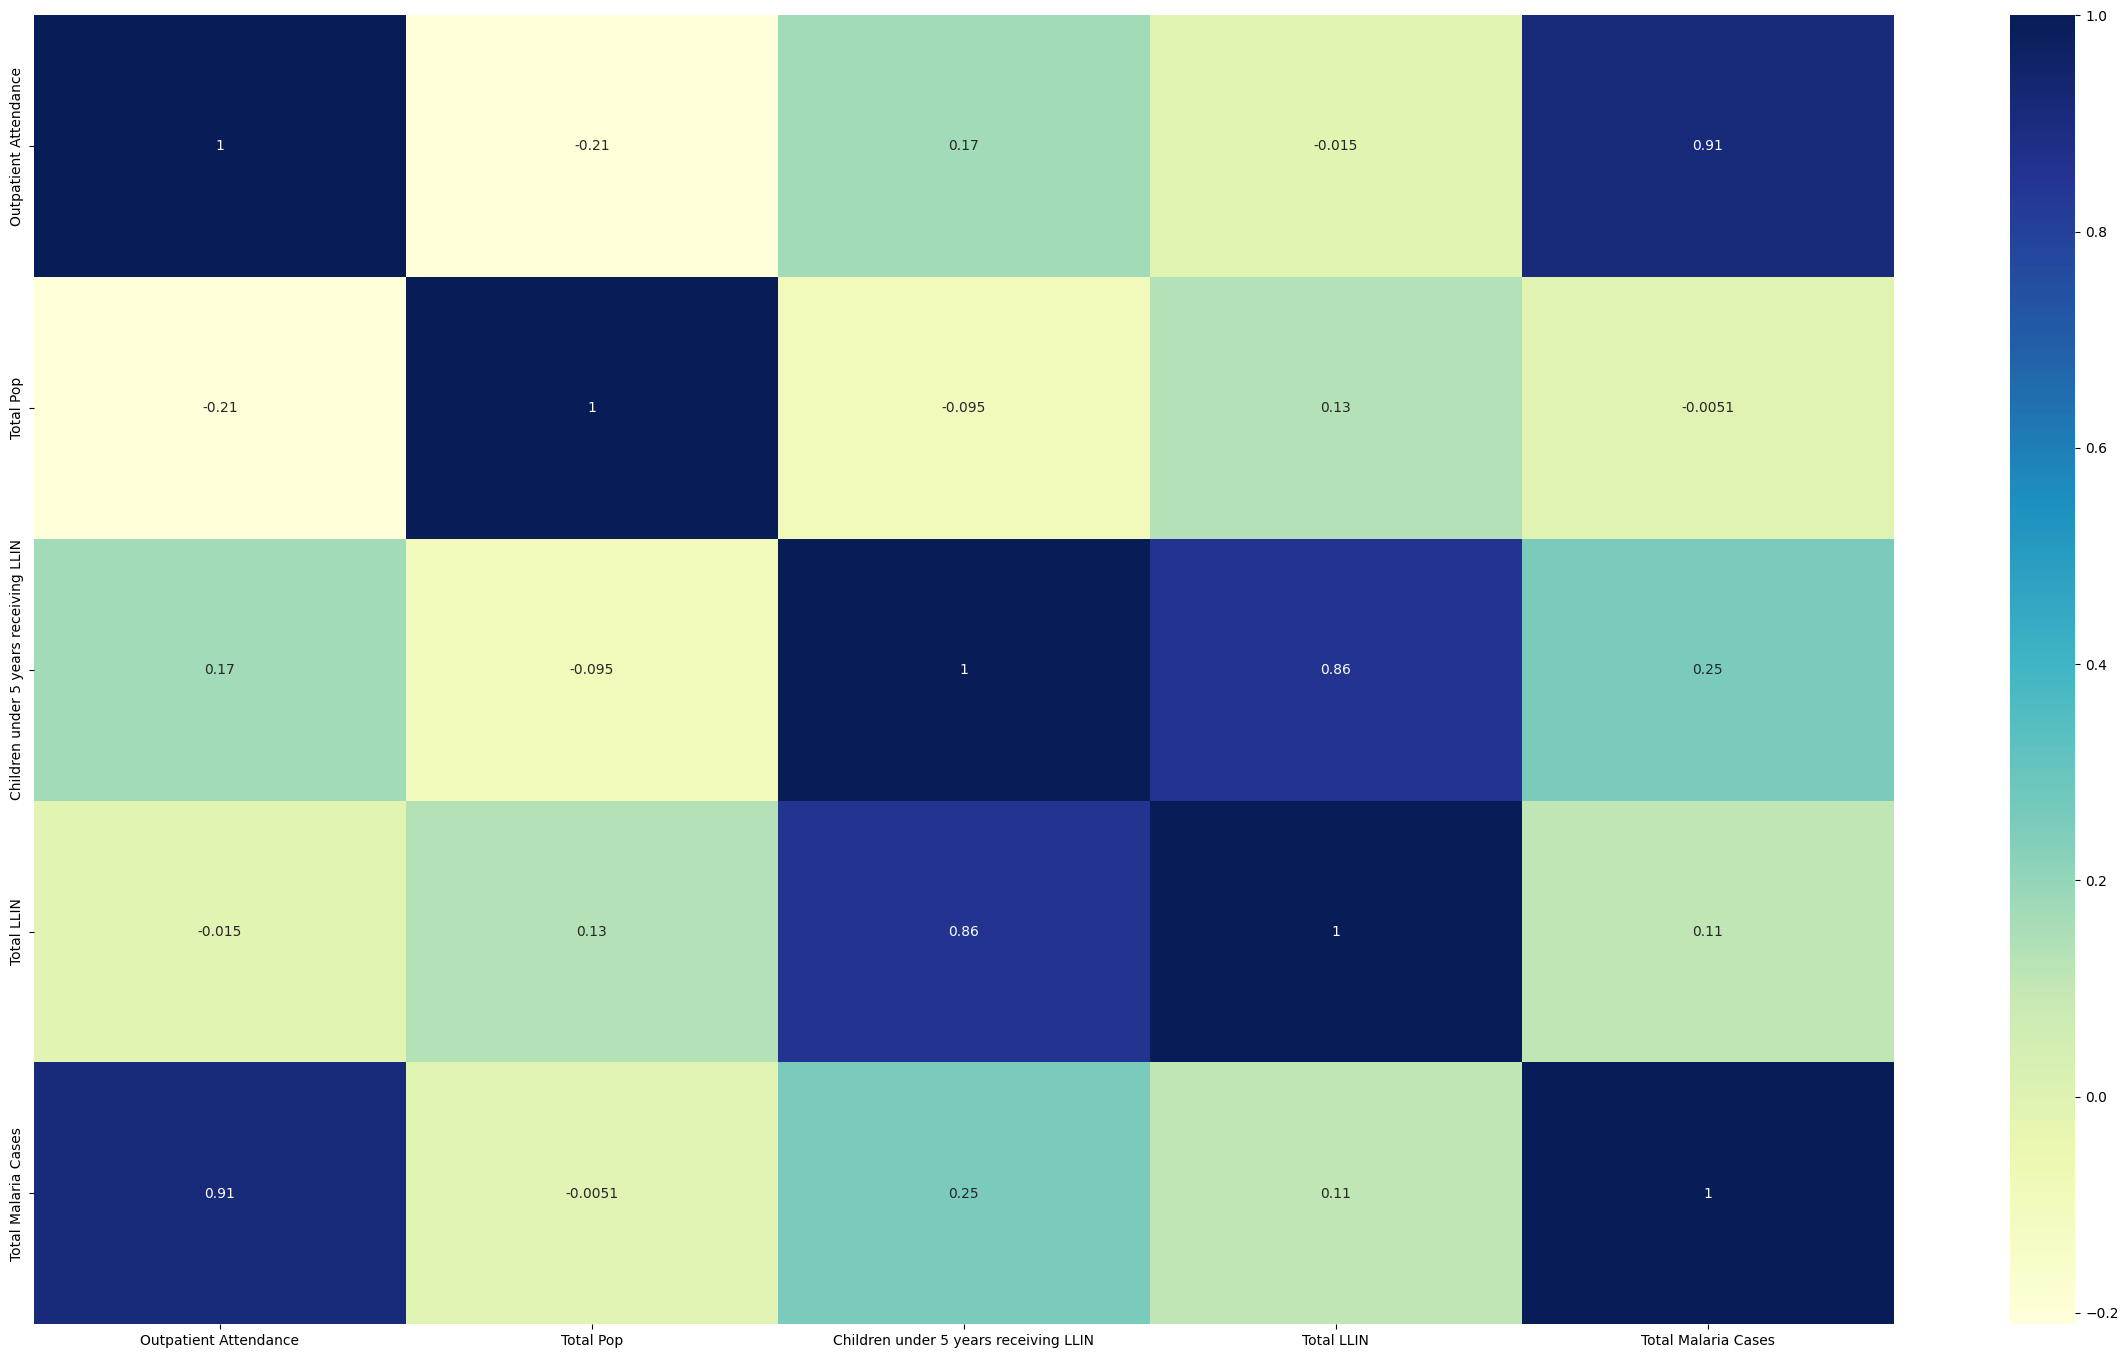

In [ ]:
#plotting the heatmap
plt.figure(figsize=(30,17))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

The heatmap explains further the correlation table

<Figure size 3000x1700 with 0 Axes>

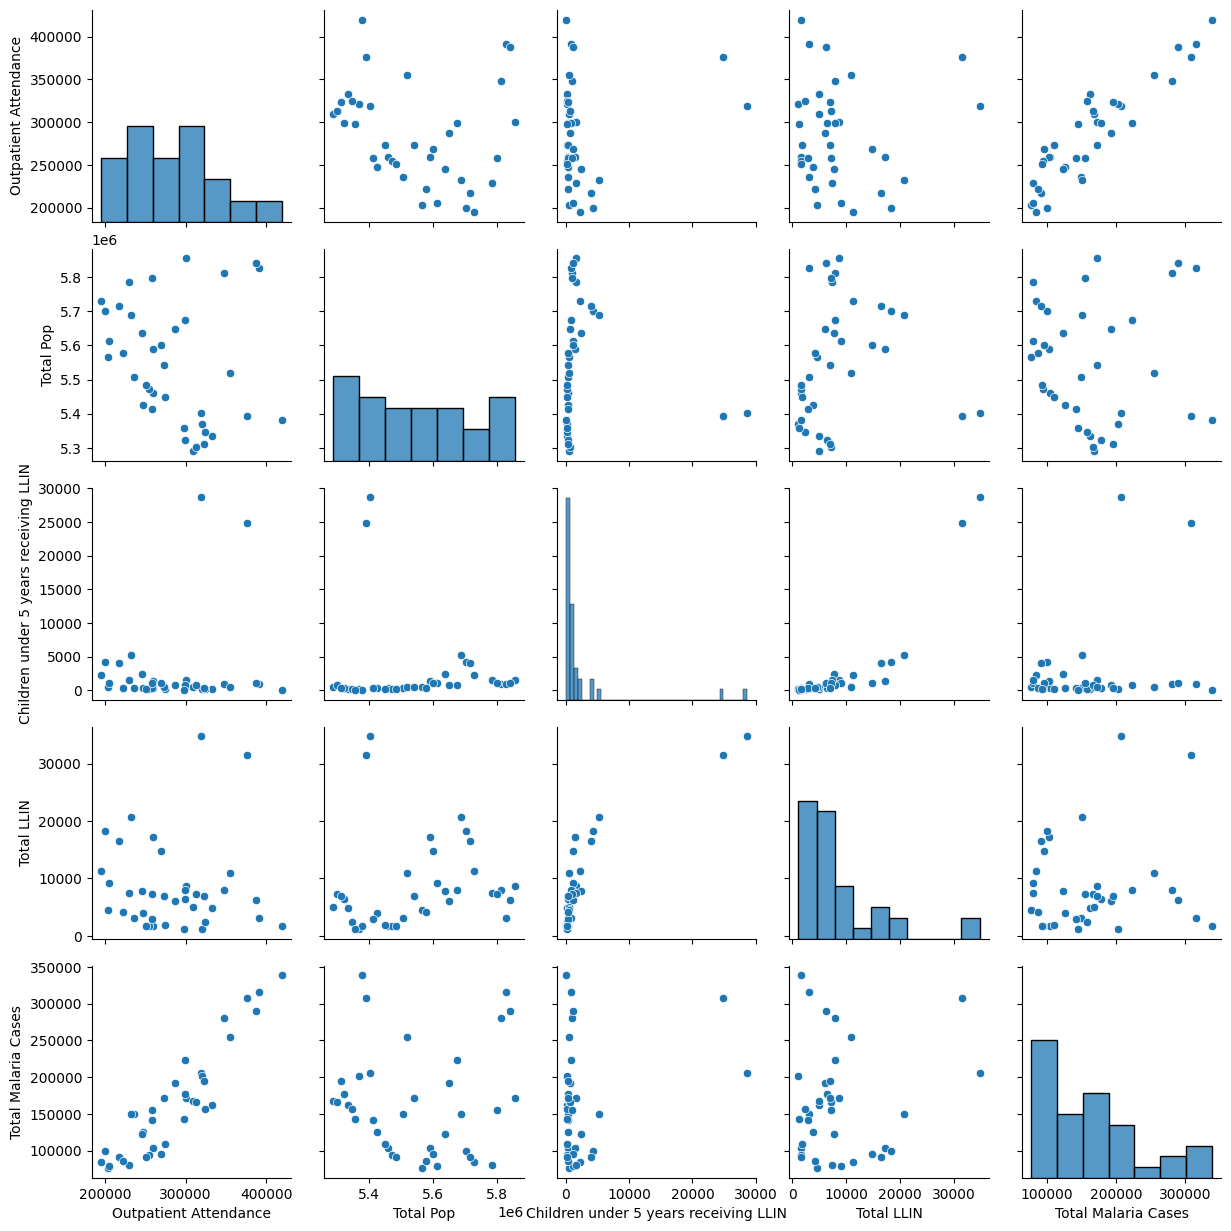

In [ ]:
plt.figure(figsize=(30,17))
sns.pairplot(train_data)

In [88]:
#performing MinMaxScaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaled_x_train=scaler.fit_transform(X_train)
scaled_x_test=scaler.fit_transform(X_test)

In [73]:
df_scaled_x_train=pd.DataFrame(scaled_x_train,columns=X_train.columns)
df_scaled_x_train.head()

,Outpatient Attendance,Total Pop,Children under 5 years receiving LLIN,Total LLIN
0,0.238575,0.538061,0.036573,0.406956
1,0.333869,1.000000,0.098322,0.399767
2,0.208046,0.517580,0.049965,0.479345
3,0.335408,0.058278,0.011259,0.155785
4,0.119991,0.688369,0.184441,0.581293


In [74]:
df_scaled_x_test=pd.DataFrame(scaled_x_test,columns=X_test.columns)
df_scaled_x_test.head()

,Outpatient Attendance,Total Pop,Children under 5 years receiving LLIN,Total LLIN
0,0.632080,0.000000,0.026299,0.197514
1,0.543536,0.113473,0.002259,0.000000
2,0.412209,0.390758,0.000000,0.027411
3,0.321833,0.320776,0.014077,0.014617
4,0.880404,0.461186,0.037754,0.279052


In [75]:
#initiating and fitting the linear regression model
from sklearn.linear_model import LinearRegression
linear=LinearRegression()
l_model=linear.fit(scaled_x_train, y_train)

In [76]:
print("Slope:",l_model.coef_)
print("Intercept:",l_model.intercept_)

Slope: [287057.81205966  24435.35388621  75200.64759885 -52023.01328669]
Intercept: 68030.52304208899


In [77]:
X_test.join(y_test)

,Outpatient Attendance,Total Pop,Children under 5 years receiving LLIN,Total LLIN,Total Malaria Cases
1,312671,5301551,727,7245,166168
6,297401,5357906,131,1286,143884
18,274753,5495616,75,2113,103092
15,259167,5460860,424,1727,103680
21,355496,5530593,1011,9705,268901
42,258344,5798188,1045,7231,154921
13,257565,5437812,105,2543,103906
24,203665,5565792,437,4551,76491
40,213555,5770457,2930,14915,74189
9,376121,5392007,24867,31456,307898


In [78]:
y_test

1     166168
6     143884
18    103092
15    103680
21    268901
42    154921
13    103906
24     76491
40     74189
9     307898
Name: Total Malaria Cases, dtype: int64

In [79]:
y_test_df = pd.DataFrame(y_test)
#y_test_df

In [80]:
y_test_df['regression_pred']=l_model.predict(df_scaled_x_test)
y_test_df['regression_pred']=np.round(y_test_df['regression_pred'], 3)
y_test_df

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


,Total Malaria Cases,regression_pred
1,166168,241176.453
6,143884,226999.325
18,103092,194480.773
15,103680,168551.590
21,268901,320348.696
42,154921,176171.722
13,103906,162376.354
24,76491,76499.719
40,74189,92722.728
9,307898,382716.553


The malaria cases and the predicted values. Notice the differences.

<Axes: >

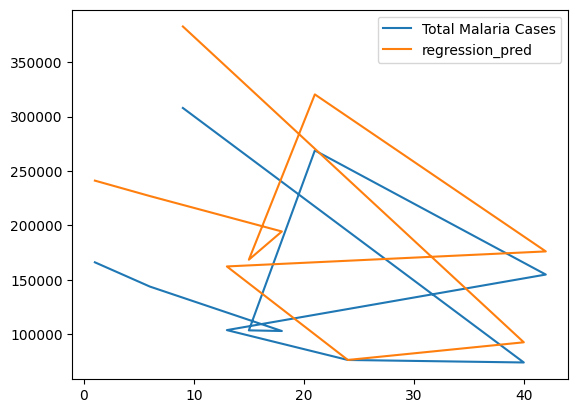

In [81]:
y_test_df[['Total Malaria Cases','regression_pred']].plot()

The difference graphically

In [82]:
error=y_test_df['Total Malaria Cases']-y_test_df['regression_pred']

61280.675762927276

<ipython-input-83-799f8cdd73a9>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(error)


<Axes: ylabel='Density'>

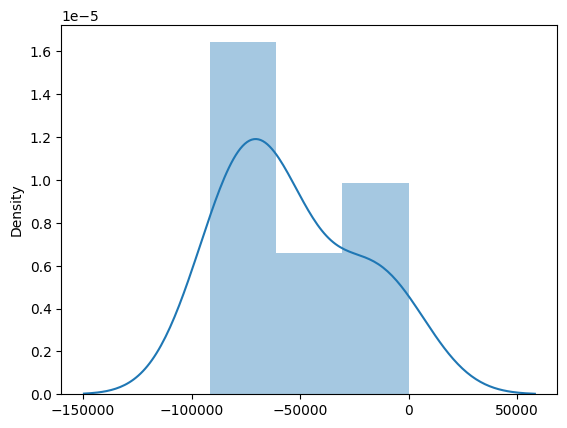

In [83]:
sns.distplot(error)

In [84]:
y_pred = l_model.predict(df_scaled_x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [86]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [87]:
# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 3755321227.022151
Root Mean Squared Error (RMSE): 61280.67580422193
Mean Absolute Error (MAE): 53891.39133457716
R-squared (R2): 0.34131862289977755


The provided values indicate the performance of a regression model.

- The Mean Squared Error (MSE) of 3755321227.022151 measures the average squared difference between the predicted and actual values.
- The Root Mean Squared Error (RMSE) of 61280.67580422193 represents the average magnitude of the residuals in the original unit.
- The Mean Absolute Error (MAE) of 53891.39133457716 measures the average absolute difference between the predicted and actual values.
- Lastly, the R-squared (R2) value of 0.34131862289977755 indicates that approximately 34.13% of the variance in the dependent variable can be explained by the independent variables in the regression model.

### Let's use stochastic gradient boosting algorithm

In [90]:
#initiating and fitting the GBR
from sklearn.ensemble import GradientBoostingRegressor
n_estimators = 5000
model = GradientBoostingRegressor(n_estimators=n_estimators, loss='squared_error', random_state=42)  # 'ls' refers to least squares loss
model.fit(X_train, y_train)

GradientBoostingRegressor(n_estimators=5000, random_state=42)

In [91]:
# Make predictions using the trained model
y_pred = model.predict(X_test)

In [92]:
# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [93]:
# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 779062330.0127424
Root Mean Squared Error (RMSE): 27911.688053801805
Mean Absolute Error (MAE): 22612.59434342007
R-squared (R2): 0.8633528751982116


This model gave us a better result as we have an R2 of about 91.6%,  it means that 86.3% of the variance in the dependent variable can be explained by the independent variables in the model.

In [94]:
y_test_df['boost_pred']=model.predict(X_test)
y_test_df['boost_pred']=np.round(y_test_df['boost_pred'], 3)
y_test_df

,Total Malaria Cases,regression_pred,boost_pred
1,166168,241176.453,189216.746
6,143884,226999.325,144353.557
18,103092,194480.773,119579.337
15,103680,168551.590,135683.089
21,268901,320348.696,258843.251
42,154921,176171.722,102869.711
13,103906,162376.354,94884.453
24,76491,76499.719,113008.299
40,74189,92722.728,79284.862
9,307898,382716.553,266524.532


Check out the differences in the predicted values and the real values compared to the regression model prediction. There seem to be better prediction as well for children under 5years.

<Axes: >

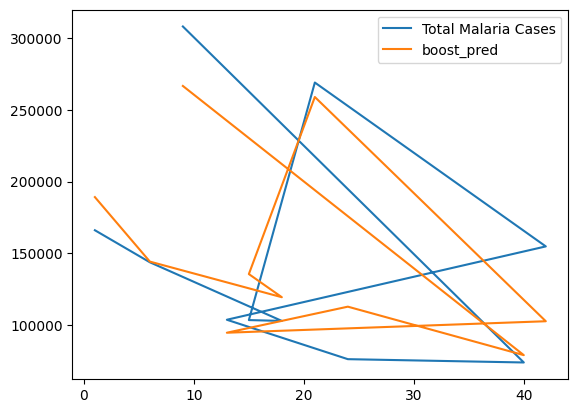

In [95]:
y_test_df[['Total Malaria Cases','boost_pred']].plot()

Diagrammatically, you can see the little difference.

<ipython-input-96-799f8cdd73a9>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(error)


<Axes: ylabel='Density'>

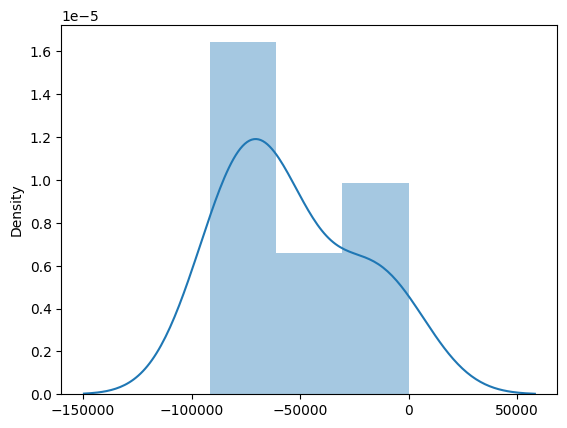

In [96]:
sns.distplot(error)

In [97]:
# Get the feature importances of the model
feature_importances = model.feature_importances_

In [98]:
# Create a dictionary to map feature names to their importance scores
feature_names = ['Outpatient Attendance', 'Total Pop',
       'Children under 5 years receiving LLIN', 'Total LLIN',
       'Total Malaria Cases']
feature_importance_dict = {feature_name: importance for feature_name, importance in zip(feature_names, feature_importances)}

In [99]:
# Sort the feature importance dictionary by importance scores in descending order
sorted_feature_importances = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

In [100]:
# Print the feature names and their importance scores
for feature_name, importance in sorted_feature_importances:
    print(f"{feature_name}: {importance}")

Outpatient Attendance: 0.8852617658511506
Total LLIN: 0.0403374858261055
Total Pop: 0.038436822653311165
Children under 5 years receiving LLIN: 0.035963925669432635


What can this tell us? It shows how each variable are important to the prediction model. As we can see the Outpatient Attendance contributed the most. Examining the LLIN varables, we will see that "Total LLIN" and "children under 5 years receiving LLIN" only contributed to 4% and 3.5% respectively and which actually means, these values contributed very little to how many people had malaria in Jigawa State. And note, this is a positive feature importance which means this values contributed 4% and 3.5% positively to the increase in Total Malaria case in Jigawa State.

In [ ]:
for feature_name, importance in feature_importance_dict.items():
    if importance > 0:
        print(f"{feature_name}: Positive importance")
    else:
        print(f"{feature_name}: Negative importance")

Outpatient Attendance: Positive importance
Total Pop: Positive importance
Children under 5 years receiving LLIN: Positive importance
Total LLIN: Positive importance


All have positive importance, it means the higher their values, the higher the independent variable and the lower their values, the lower the independent variable.

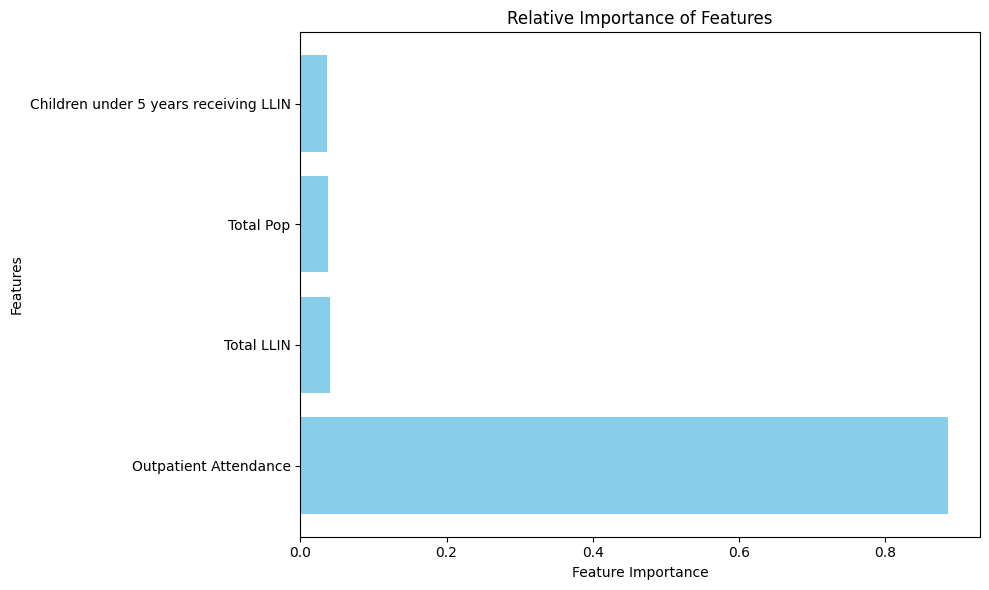

In [101]:
# Extract the feature names and importance scores
feature_names = [feature_name for feature_name, _ in sorted_feature_importances]
importance_scores = [importance for _, importance in sorted_feature_importances]

# Plot the feature importances as a bar plot
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_names)), importance_scores, align='center', color='skyblue')
plt.yticks(range(len(feature_names)), feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Relative Importance of Features')
plt.tight_layout()
plt.show()

A bar chart showing how important the variables are performing in the created model.